# CelebA Dataset: Smile detection using CNN in PyTorch

The <b>CelebA dataset</b> contains over 200K images of celebrity faces, along with 40 binary attributes per image. These attributes specify a variety of facial features and poses, telling us e.g. whether or not the celebrity is wearing glasses, or has blond hair, or is smiling in the image, et cetera. In this notebook, we will train a convolutional neural network (CNN) using PyTorch to <b>detect smiling</b> in the CelebA images. 

First we will load the images from <b>torchvision.datasets</b>. Then we will examine some image augmentation techniques which we will apply to our training set. Finally, after training our CNN we will study its performance on unseen test images.

In [1]:
import torch
import torch.nn as nn
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt
import numpy as np

## Loading dataset from torchvision:

In [47]:
image_path = './'

celeba_dataset = torchvision.datasets.CelebA(image_path, split='all', target_type='attr', download=True)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [48]:
celeba_dataset  # The full celeba_dataset contains 202599 images

Dataset CelebA
    Number of datapoints: 202599
    Root location: ./
    Target type: ['attr']
    Split: all

In [64]:
celeba_dataset[0]  
# Each element of celeb_dataset is a tuple, the first element of which is an image (178x218).
# The second element of the tuple is a tensor (with 40 elements) of binary attributes.

(<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=178x218>,
 tensor([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
         1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1]))

In [65]:
celeba_dataset.attr_names    # The names of each of the 40 binary attributes can be accessed with attr_names.

['5_o_Clock_Shadow',
 'Arched_Eyebrows',
 'Attractive',
 'Bags_Under_Eyes',
 'Bald',
 'Bangs',
 'Big_Lips',
 'Big_Nose',
 'Black_Hair',
 'Blond_Hair',
 'Blurry',
 'Brown_Hair',
 'Bushy_Eyebrows',
 'Chubby',
 'Double_Chin',
 'Eyeglasses',
 'Goatee',
 'Gray_Hair',
 'Heavy_Makeup',
 'High_Cheekbones',
 'Male',
 'Mouth_Slightly_Open',
 'Mustache',
 'Narrow_Eyes',
 'No_Beard',
 'Oval_Face',
 'Pale_Skin',
 'Pointy_Nose',
 'Receding_Hairline',
 'Rosy_Cheeks',
 'Sideburns',
 'Smiling',
 'Straight_Hair',
 'Wavy_Hair',
 'Wearing_Earrings',
 'Wearing_Hat',
 'Wearing_Lipstick',
 'Wearing_Necklace',
 'Wearing_Necktie',
 'Young',
 '']

In [66]:
celeba_dataset.attr_names[31]   # 'Smiling' is the 31st attribute. We are interested in only this attribute.

'Smiling'

## Example images from CelebA dataset:

Let's display a selection of images from the CelebA dataset. We can choose a couple of images and display them alongside their list of attributes. 

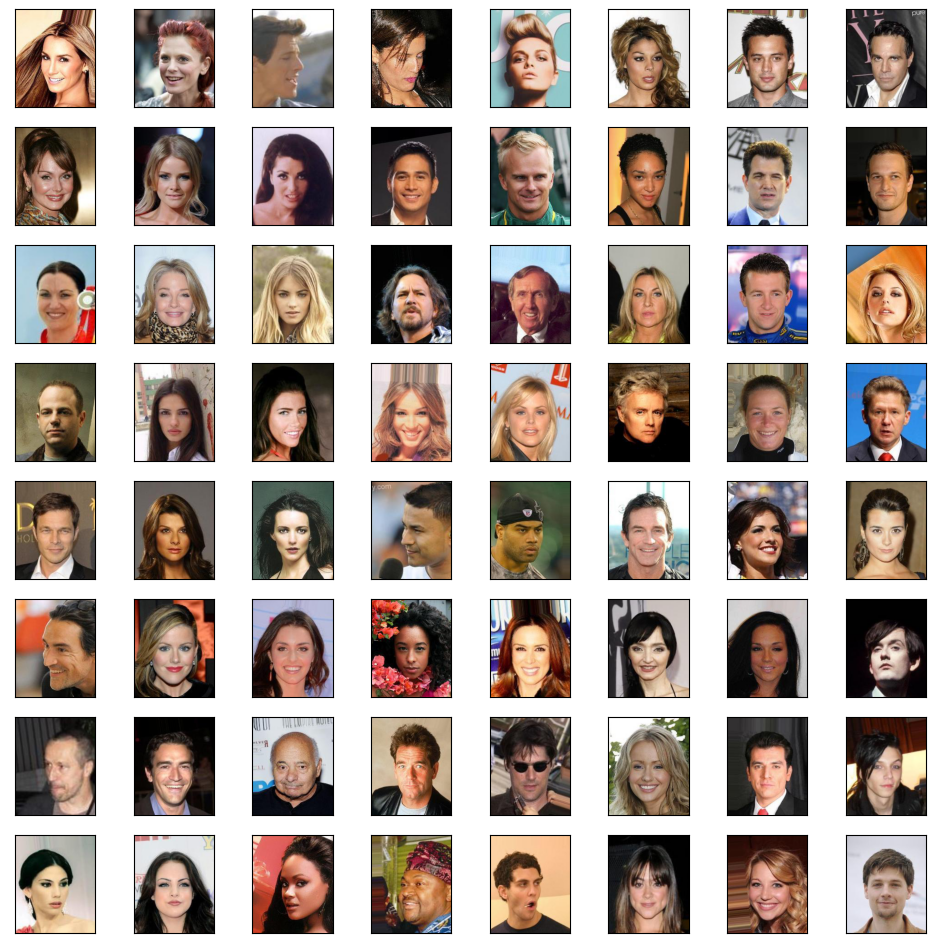

In [52]:
fig, axs = plt.subplots(8, 8, figsize=(12, 12))
index = 0

for i in range(8):
    for j in range(8):

        axs[i, j].imshow(celeba_dataset[index][0])
        axs[i, j].set_xticks([])
        axs[i, j].set_yticks([])
        #axs[i, j].axis('off')
        index += 1

In both images below, the smiling attribute has a value of 1, indicating they have been labeled as containing a smile:

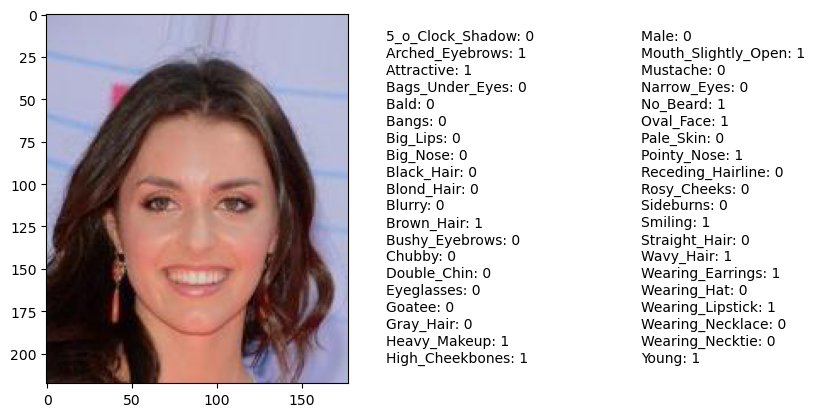

In [83]:
image_idx = 42
plt.imshow(celeba_dataset[image_idx][0])
for i in range(20):
    plt.text(x=200, y=15+10*i, s=f'{celeba_dataset.attr_names[i]}: {celeba_dataset[image_idx][1][i]}')
for i in range(20, 40):
    plt.text(x=350, y=15+10*(i-20), s=f'{celeba_dataset.attr_names[i]}: {celeba_dataset[image_idx][1][i]}')

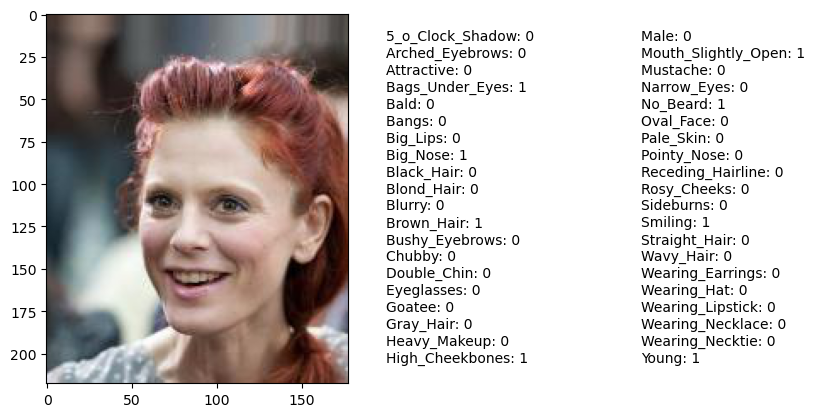

In [84]:
image_idx = 1
plt.imshow(celeba_dataset[image_idx][0])
for i in range(20):
    plt.text(x=200, y=15+10*i, s=f'{celeba_dataset.attr_names[i]}: {celeba_dataset[image_idx][1][i]}')
for i in range(20, 40):
    plt.text(x=350, y=15+10*(i-20), s=f'{celeba_dataset.attr_names[i]}: {celeba_dataset[image_idx][1][i]}')

## Data augmentation:

Image augmentation allows us to add additional samples to our training set by applying transfomations to our data. This can help improve performance by reducing overfitting and making our model more robust to variations such as image orientation, contrast, and noise. Here we will look at 5 different image transformations, and implement them using <b>torchvision.transforms</b>:

1. Cropping image to a bounding box
2. Flipping horizontally
3. Adjusting contrast
4. Adjusting brightness
5. Center cropping and resizing

##### 1. Cropping image to a bounding box

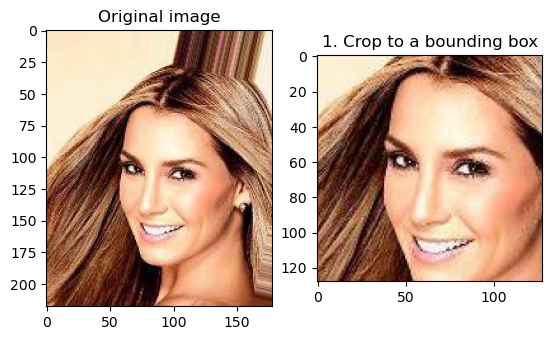

In [55]:
img, att = celeba_dataset[0]
img_cropped = transforms.functional.crop(img, 50, 20, 128, 128)

fig, axs = plt.subplots(1, 2)
axs[0].imshow(img)
axs[0].set_title('Original image')
axs[1].imshow(img_cropped)
axs[1].set_title('1. Crop to a bounding box')
plt.show()

##### 2. Flipping image horizontally

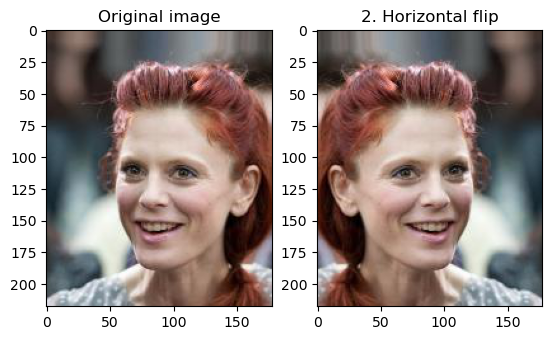

In [56]:
img, att = celeba_dataset[1]
img_cropped = transforms.functional.hflip(img)

fig, axs = plt.subplots(1, 2)
axs[0].imshow(img)
axs[0].set_title('Original image')
axs[1].imshow(img_cropped)
axs[1].set_title('2. Horizontal flip')
plt.show()

##### 3. Adjusting contrast

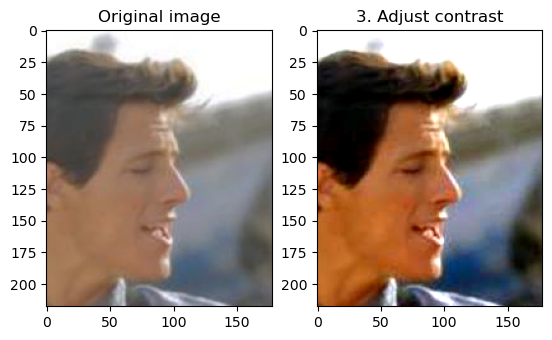

In [57]:
img, att = celeba_dataset[2]
img_cropped = transforms.functional.adjust_contrast(img, contrast_factor=2)

fig, axs = plt.subplots(1, 2)
axs[0].imshow(img)
axs[0].set_title('Original image')
axs[1].imshow(img_cropped)
axs[1].set_title('3. Adjust contrast')
plt.show()

##### 4. Adjusting brightness

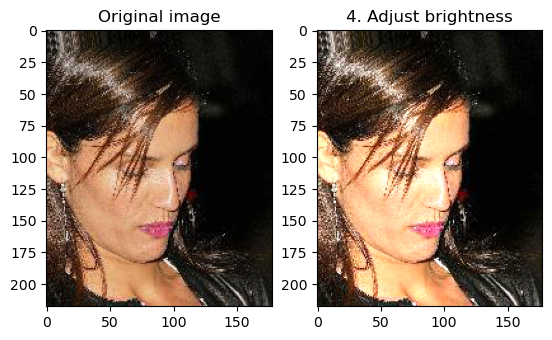

In [58]:
img, att = celeba_dataset[3]
img_cropped = transforms.functional.adjust_brightness(img, brightness_factor=1.3)

fig, axs = plt.subplots(1, 2)
axs[0].imshow(img)
axs[0].set_title('Original image')
axs[1].imshow(img_cropped)
axs[1].set_title('4. Adjust brightness')
plt.show()

##### 5. Center-cropping + resize

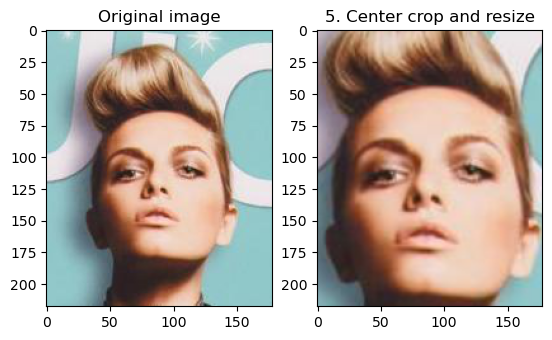

In [59]:
img, att = celeba_dataset[4]
img_center_cropped = transforms.functional.center_crop(img, [0.7*218, 0.7*178])
img_resized = transforms.functional.resize(img_center_cropped, size=(218, 178))

fig, axs = plt.subplots(1, 2)
axs[0].imshow(img)
axs[0].set_title('Original image')
axs[1].imshow(img_resized)
axs[1].set_title('5. Center crop and resize')
plt.show()

##### Transformations for training set:

Below we will specify separate datasets containing our training, validation, and test images. For our training set, we will apply a sequence of augmentations: a <b>random crop</b> (of fixed dimension), followed by a <b>random horizontal flip</b> (with probability 0.5), and a final <b>resizing</b> to 64x64 pixels.

For the validation and test sets, we do not apply these augmentation, but only perform a center crop and a resizing also to 64x64.

In [60]:
# Transformation for the training dataset:

transform_train = transforms.Compose([
    transforms.RandomCrop([178, 178]),
    transforms.RandomHorizontalFlip(),
    transforms.Resize([64, 64]),
    transforms.ToTensor()
])

In [61]:
# Transformation for the validation and test datasets:

transform = transforms.Compose([
    transforms.CenterCrop([178, 178]),
    transforms.Resize([64, 64]),
    transforms.ToTensor()
])

In [62]:
# To make 'smile' attribute the target (i.e. attribute 31 in list of 40 attributes), define:
get_smile = lambda attr: attr[31]    

# This will be used in 'target_transform' below when loading the training, validation, and test splits.

In [63]:
celeba_train_dataset = torchvision.datasets.CelebA(image_path, split='train', target_type='attr', download=False, transform=transform_train, target_transform=get_smile)

celeba_valid_dataset = torchvision.datasets.CelebA(image_path, split='valid', target_type='attr', download=False, transform=transform, target_transform=get_smile)

celeba_test_dataset = torchvision.datasets.CelebA(image_path, split='test', target_type='attr', download=False, transform=transform, target_transform=get_smile)

In [67]:
celeba_train_dataset

Dataset CelebA
    Number of datapoints: 162770
    Root location: ./
    Target type: ['attr']
    Split: train
    StandardTransform
Transform: Compose(
               RandomCrop(size=(178, 178), padding=None)
               RandomHorizontalFlip(p=0.5)
               Resize(size=[64, 64], interpolation=bilinear, max_size=None, antialias=warn)
               ToTensor()
           )
Target transform: <function <lambda> at 0x00000255AE27E7A0>

In [68]:
celeba_valid_dataset

Dataset CelebA
    Number of datapoints: 19867
    Root location: ./
    Target type: ['attr']
    Split: valid
    StandardTransform
Transform: Compose(
               CenterCrop(size=[178, 178])
               Resize(size=[64, 64], interpolation=bilinear, max_size=None, antialias=warn)
               ToTensor()
           )
Target transform: <function <lambda> at 0x00000255AE27E7A0>

In [69]:
celeba_test_dataset

Dataset CelebA
    Number of datapoints: 19962
    Root location: ./
    Target type: ['attr']
    Split: test
    StandardTransform
Transform: Compose(
               CenterCrop(size=[178, 178])
               Resize(size=[64, 64], interpolation=bilinear, max_size=None, antialias=warn)
               ToTensor()
           )
Target transform: <function <lambda> at 0x00000255AE27E7A0>

## Create DataLoaders and specify batch size:

In this notebook, to reduce training time we will use only a subset of the data. We will use 16000 images from the training set, and 1000 images in both the validation and test sets. 

In [70]:
from torch.utils.data import Subset
celeba_train_dataset = Subset(celeba_train_dataset, torch.arange(16000))
celeba_valid_dataset = Subset(celeba_valid_dataset, torch.arange(1000))
celeba_test_dataset = Subset(celeba_test_dataset, torch.arange(1000))


batch_size = 32
torch.manual_seed(1)

train_dl = DataLoader(celeba_train_dataset, batch_size, shuffle=True)
valid_dl = DataLoader(celeba_valid_dataset, batch_size, shuffle=True)
test_dl = DataLoader(celeba_test_dataset, batch_size, shuffle=True)

# Create CNN using nn.Sequential:

In [71]:
model = nn.Sequential(

    nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2),
    nn.Dropout(p=0.5),
    nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2),
    nn.Dropout(p=0.5),
    nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2),
    nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.AvgPool2d(kernel_size=8),
    nn.Flatten(),
    nn.Linear(in_features=256, out_features=1),
    nn.Sigmoid()

)

Recall that each RGB image has been resized to a height and width of 64 x 64, and since there are 3 channels, the input dimension of a given image in a minibatch is $(3, 64, 64)$, in \[C, H, W\] format. 

Our CNN will consist of 4 convolutions, each followed by a ReLU and a pooling operation. We will also use two dropout layers, implemented after the first 2 convolutions.

For each convolution, we choose a filter size of $3$ and use same padding, keeping the height $H$ and width $W$ unchanged. Our MaxPool2d operations half the image height and width each time they are applied. 

After applying these convolutions, the output is flattened and passed through a final linear layer with a sigmoid activation.

Below we list the <b>dimensions</b> of the output tensor (for a given image in a minibatch) for each layer:

1. <b>Conv2d</b>: 32 filters of size 3x3 (f=3), with 'same' padding (p=1, s=1). 
           Output dimension: (32, 64, 64)

2. <b>ReLU</b>: Activation function. Dimensions unchanged. 
           Output dimension: (32, 64, 64)

3. <b>MaxPool2d</b>: Uses default value of stride = kernel_size. If kernel_size = 2, this halves the image height and width.
           Output dimension: (32, 32, 32)   

4. <b>Dropout</b>: Activations are set to 0 with probability p=0.5. Dimensions unchanged. 
           Output dimension: (32, 32, 32)

5. <b>Conv2d</b>: 64 filters of size 3x3 (f=3), with 'same' padding (p=1, s=1). 
           Output dimension: (64, 32, 32)

6. <b>ReLU</b>: Activation function. Dimensions unchanged. 
           Output dimension: (64, 32, 32)

7. <b>MaxPool2d</b>: Uses default value of stride = kernel_size. If kernel_size = 2, this halves the image height and width.
           Output dimension: (64, 16, 16)

8. <b>Dropout</b>: Activations are set to 0 with probability p=0.5. Dimensions unchanged. 
           Output dimension: (64, 16, 16)

9. <b>Conv2d</b>: 128 filters of size 3x3 (f=3), with 'same' padding (p=1, s=1). 
           Output dimension: (128, 16, 16)

10. <b>ReLU</b>: Activation function. Dimensions unchanged. 
           Output dimension: (128, 16, 16)

11. <b>MaxPool2d</b>: Uses default value of stride = kernel_size. If kernel_size = 2, this halves the image height and width.
           Output dimension: (128, 8, 8)

12. <b>Conv2d</b>: 256 filters of size 3x3 (f=3), with 'same' padding (p=1, s=1). 
           Output dimension: (256, 8, 8)

13. <b>ReLU</b>: Activation function. Dimensions unchanged. 
           Output dimension: (256, 8, 8)

14. <b>AvgPool2d</b>: Uses default value of stride = kernel_size. If kernel_size=8, and H=W=8, we are averaging each 8x8 channel to get a single number. 
           Output dimension: (256, 1, 1)

15. <b>Flatten</b>: Flattens the output tensor from AvgPool2d yielding a 1d tensor of length 256.
           Output dimension: (256)

16. <b>Linear</b>: Single linear transformation layer with one output node. Output single number z.
           Output dimension: (1)

17. <b>Sigmoid</b>: Output activation function sigmoid(z). Output single number in range [0, 1].
           Output dimension: (1)

## Training ConvNet:

In [72]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [73]:
def train(model, num_epochs, train_dl, valid_dl):
    
    loss_hist_train = [0] * num_epochs
    accuracy_hist_train = [0] * num_epochs
    loss_hist_valid = [0] * num_epochs
    accuracy_hist_valid = [0] * num_epochs
    
    for epoch in range(num_epochs):
        
        model.train()
        
        # batch_number = 0
        
        for x_batch, y_batch in train_dl:
            
            #print(f'Batch {batch_number}')
            #batch_number += 1
            
            pred = model(x_batch)[:, 0]
            loss = loss_fn(pred, y_batch.float())
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            
            loss_hist_train[epoch] += loss.item()*y_batch.size(0)
            is_correct = ((pred>=0.5).float() == y_batch).float()
            accuracy_hist_train[epoch] += is_correct.sum()
        
        loss_hist_train[epoch] /= len(train_dl.dataset)
        accuracy_hist_train[epoch] /= len(train_dl.dataset)
        
        
        model.eval()
        with torch.no_grad():
            for x_batch, y_batch in valid_dl:
                
                pred = model(x_batch)[:, 0]
                loss = loss_fn(pred, y_batch.float())
                
                loss_hist_valid[epoch] += loss.item()*y_batch.size(0)
                is_correct = ((pred>=0.5).float() == y_batch).float()
                accuracy_hist_valid[epoch] += is_correct.sum()

        loss_hist_valid[epoch] /= len(valid_dl.dataset)
        accuracy_hist_valid[epoch] /= len(valid_dl.dataset)
        
        
        print(f'Epoch {epoch+1}    Train accuracy: {accuracy_hist_train[epoch]:.4f}      Validation accuracy: {accuracy_hist_valid[epoch]:.4f} \n')

                
    return loss_hist_train, loss_hist_valid, accuracy_hist_train, accuracy_hist_valid

In [74]:
torch.manual_seed(1)
num_epochs = 30
hist = train(model, num_epochs, train_dl, valid_dl)

Epoch 1    Train accuracy: 0.5132      Validation accuracy: 0.5140 

Epoch 2    Train accuracy: 0.5281      Validation accuracy: 0.5260 

Epoch 3    Train accuracy: 0.5476      Validation accuracy: 0.5780 

Epoch 4    Train accuracy: 0.5979      Validation accuracy: 0.6140 

Epoch 5    Train accuracy: 0.6233      Validation accuracy: 0.6060 

Epoch 6    Train accuracy: 0.6407      Validation accuracy: 0.6490 

Epoch 7    Train accuracy: 0.6510      Validation accuracy: 0.6590 

Epoch 8    Train accuracy: 0.6683      Validation accuracy: 0.6680 

Epoch 9    Train accuracy: 0.6861      Validation accuracy: 0.6780 

Epoch 10    Train accuracy: 0.7180      Validation accuracy: 0.7480 

Epoch 11    Train accuracy: 0.7509      Validation accuracy: 0.7000 

Epoch 12    Train accuracy: 0.7848      Validation accuracy: 0.7670 

Epoch 13    Train accuracy: 0.8066      Validation accuracy: 0.8450 

Epoch 14    Train accuracy: 0.8251      Validation accuracy: 0.8580 

Epoch 15    Train accuracy: 0

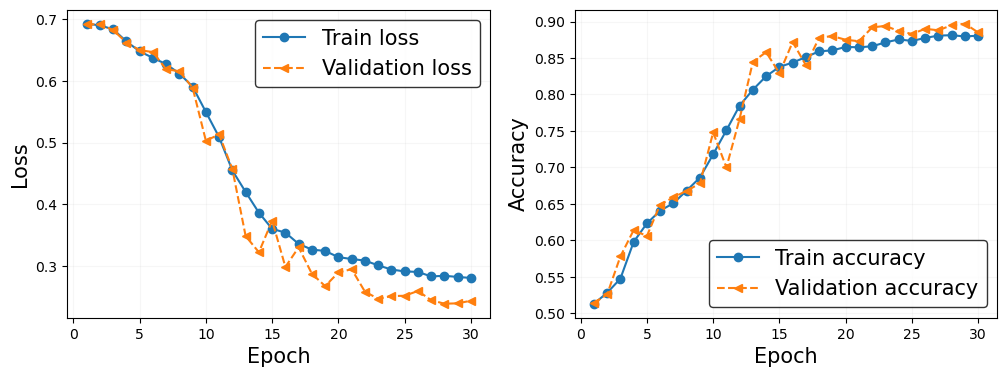

In [85]:
x_arr = np.arange(len(hist[0])) + 1
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist[0], '-o', label='Train loss')
ax.plot(x_arr, hist[1], '--<', label='Validation loss')
ax.legend(fontsize=15, frameon=True, edgecolor='k')
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)
ax.grid(alpha=0.1)
ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist[2], '-o', label='Train accuracy')
ax.plot(x_arr, hist[3], '--<', label='Validation accuracy')
ax.legend(fontsize=15, frameon=True, edgecolor='k')
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)
ax.grid(alpha=0.1)
plt.show()

## Evaluate on test data:

In [86]:
accuracy_test = 0
model.eval()
with torch.no_grad():
    for x_batch, y_batch in test_dl:
        
        pred = model(x_batch)[:, 0]
        is_correct = ((pred>=0.5).float() == y_batch).float()
        accuracy_test += is_correct.sum()
        
accuracy_test /= len(test_dl.dataset)

print(f'Test accuracy: {accuracy_test:.4f}')

Test accuracy: 0.9190


Our smile detection model has achieved an accuracy of $91.90\%$ on the test dataset!

Let's have a closer look at some of the images in the test dataset, along with their smile attribute ($1$ or $0$ label), and the probability $P(\textrm{smile})$ our model assigns to the presence of a smile. Note that the model predicts a smile if $P(\textrm{smile})>0.5$.

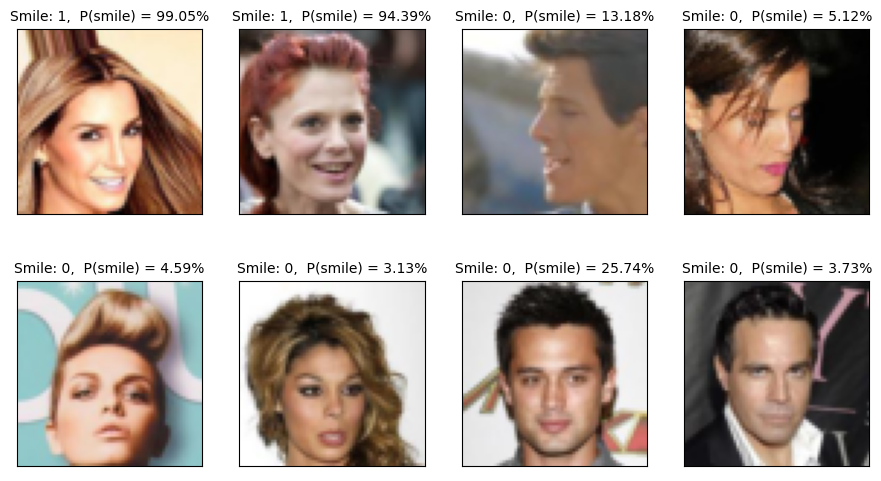

In [87]:
fig, axs = plt.subplots(2, 4, figsize=(11, 6))
img_index = 0

for i in range(2):
    for j in range(4):
        
        img = celeba_train_dataset[img_index][0]
        prob = model(img.unsqueeze(0))
        prob = prob.item()
        label = celeba_train_dataset[img_index][1].item()
                
        axs[i, j].imshow(img.permute(1,2,0))
        axs[i, j].set_xticks([])
        axs[i, j].set_yticks([])
        axs[i, j].set_title(f'Smile: {label},  P(smile) = {(prob*100):.2f}%', fontsize=10)
        
        img_index += 1
        
plt.show()

Our model correctly classifies all 8 images displayed above. However, we can take a closer look at some misclassified images, i.e. images labeled as $1$ where we do not detect a smile, and those images labeled $0$ where our model does detect a smile. 

In [105]:
misclassified = []

for img_idx in range(len(test_dl.dataset)):
    
    img = test_dl.dataset[img_idx][0]   # Test image has dimension (3, 64, 64) (3 channels)
    
    prob = model(img.unsqueeze(0))
    prob = prob.item()
    pred = (prob >= 0.5)
    
    attr = test_dl.dataset[img_idx][1].item()  
    
    correct = int(pred == attr)
    
    if correct == 0:
        misclassified.append(img_idx)    

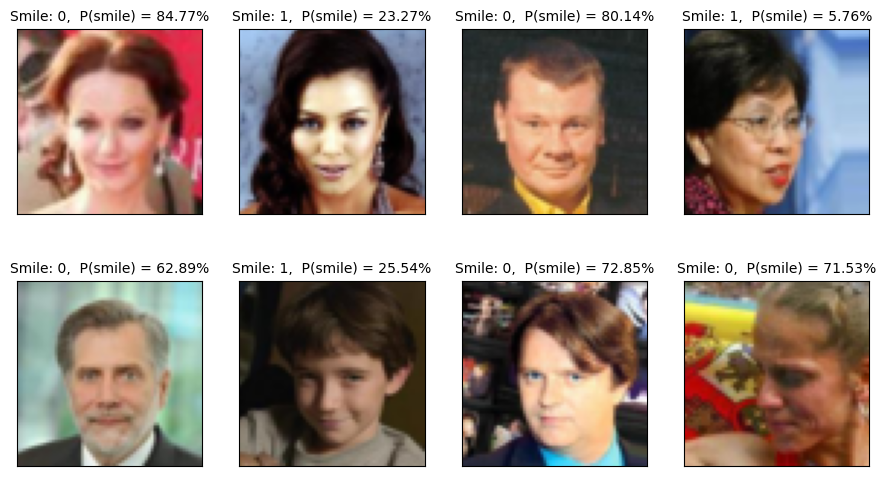

In [136]:
fig, axs = plt.subplots(2, 4, figsize=(11, 6))
img_index = 0

for i in range(2):
    for j in range(4):
        
        img = test_dl.dataset[misclassified[img_index]][0]
        prob = model(img.unsqueeze(0))
        prob = prob.item()
        label = test_dl.dataset[misclassified[img_index]][1].item()
                
        axs[i, j].imshow(img.permute(1,2,0))
        axs[i, j].set_xticks([])
        axs[i, j].set_yticks([])
        axs[i, j].set_title(f'Smile: {label},  P(smile) = {(prob*100):.2f}%', fontsize=10)
        
        img_index += 1
        
plt.show()

Here it seems the images we get wrong are a little more ambiguous. Our model predicts a smile in the first image displayed here with a probability of $84.77\%$, yet its true label is $0$, i.e. no smile. Although our model has an overall error rate of $8.1\%$, we should keep in mind the human labels assigned to each image in the CelebA dataset may themselves be erroneous or open to interpretation in some cases.